## Covid Thorax X-Ray Image Classifier
#### Dataset: http://ugm.id/MVDataset
#### Computer Science and Image Analysis - Second Assignment
---
##### Katarina Keishanti Joanne Kartakusuma
##### 21/472847/PA/20347
**Note**: I did the work on jupyter notebook locally and import to google colab

### Import Library

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

import tensorflow as tf
import imghdr
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.utils import shuffle

2023-04-24 22:54:49.480831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Acquisition

In [56]:
data = "/Users/katarinajoanne/University/UGM/2 - Second Year/Fourth Semester/Computer Vision and Image Analysis/Assignment-2/data"

In [58]:
os.listdir(data)

['Positif', 'Negatif']

In [59]:
os.listdir(os.path.join(data, "Negatif"))

['9fdd3c3032296fd04d2cad5d9070d4_jumbo.jpeg',
 '8FDE8DBA-CFBD-4B4C-B1A4-6F36A93B7E87.jpeg',
 'figure1-5e7c1b8d98c29ab001275405-98.jpeg',
 'da9e9aac-de8c-44c7-ba57-e7cc8e4caaba.annot.original.jpeg',
 '31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
 '7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg',
 '446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg',
 'figure1-5e73d7ae897e27ff066a30cb-98.jpeg',
 'nejmoa2001191_f5-PA.jpeg',
 'aspiration-pneumonia-5-day27.jpg',
 'nejmc2001573_f1a.jpeg',
 'jkms-35-e79-g001-l-c.jpg',
 'jkms-35-e79-g001-l-b.jpg',
 '2B8649B2-00C4-4233-85D5-1CE240CF233B.jpeg',
 'aspiration-pneumonia-5-day0.jpg',
 'auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg',
 'jkms-35-e79-g001-l-a.jpg',
 'aspiration-pneumonia-5-day3.jpg',
 '5e6dd879fde9502400e58b2f.jpeg',
 '7E335538-2F86-424E-A0AB-6397783A38D0.jpeg',
 'nCoV-Snohomish-20382862_web1_M1-Lungs-EDH-200201-640x300@2x.jpg',
 '4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',
 'pneum

In [60]:
for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data, image_class)):
        print(image)

covid-19-pneumonia-rapidly-progressive-3-days.jpg
covid-19-pneumonia-23-day9.jpg
covid-19-pneumonia-22-day2-pa.png
covid-19-pneumonia-rapidly-progressive-12-hours.jpg
covid-19-pneumonia-7-PA.jpg
covid-19-pneumonia-43-day0.jpeg
covid-19-pneumonia-30-PA.jpg
covid-19-pneumonia-14-PA.png
covid-19-pneumonia-44-day-0.jpeg
covid-19-pneumonia-38-l.jpg
covid-19-pneumonia-49-day8.jpg
covid-19-pneumonia-evolution-over-a-week-1-day0-L.jpg
covid-19-pneumonia-evolution-over-a-week-1-day4.jpg
covid-19-pneumonia-35-1.jpg
covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-2.jpg
covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-3.jpg
covid-19-pneumonia-38-pa.jpg
covid-19-pneumonia-7-L.jpg
covid-19-pneumonia-35-2.jpg
covid-19-pneumonia-20-pa-on-admission.jpg
covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-1.jpg
covid-19-pneumonia-28.png
covid-19-pneumonia-evolution-over-a-week-1-day0-PA.jpg
covid-19-pneumonia-evolution-over-a-week-1

In [62]:
img = cv2.imread(os.path.join("data", "Negatif", "1-s2.0-S0140673620303706-fx1_lrg.jpg"))

In [63]:
img.shape

(1148, 2563, 3)

In [68]:
# Resize image to 256x256

dataset = tf.keras.utils.image_dataset_from_directory("data",
                                                     image_size = (256, 256),
                                                     batch_size = 32)

Found 156 files belonging to 2 classes.


In [69]:
data_iterator = dataset.as_numpy_iterator()

In [70]:
batch = data_iterator.next()

In [71]:
batch[0].shape

(32, 256, 256, 3)

In [72]:
batch[1]

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

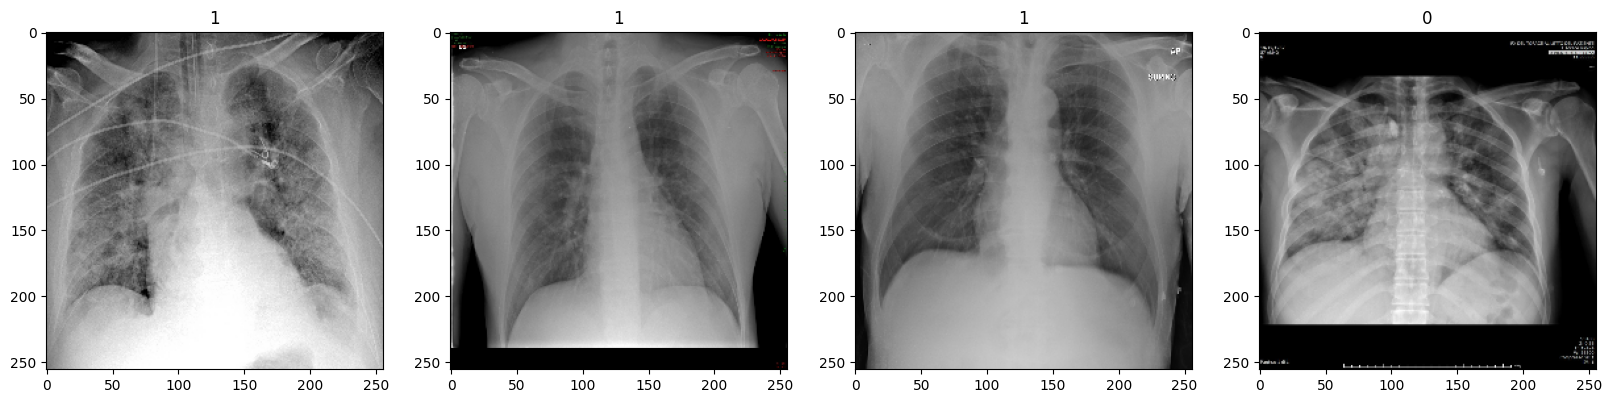

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    
# 1 is Positive or Covid
# 0 is Negative or Not Covid

In [74]:
batch[0].min()

0.0

In [17]:
batch[0].max()

255.0

### Data Preprocessing

In [75]:
# Scaling the data

dt = dataset.map(lambda x, y:
                (x/255, y))

In [76]:
dt.as_numpy_iterator().next()

(array([[[[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.00392

In [77]:
scaled_iterator = dt.as_numpy_iterator()

In [78]:
batch = scaled_iterator.next()

In [79]:
batch[0].max()

1.0

In [80]:
batch[0].min()

0.0

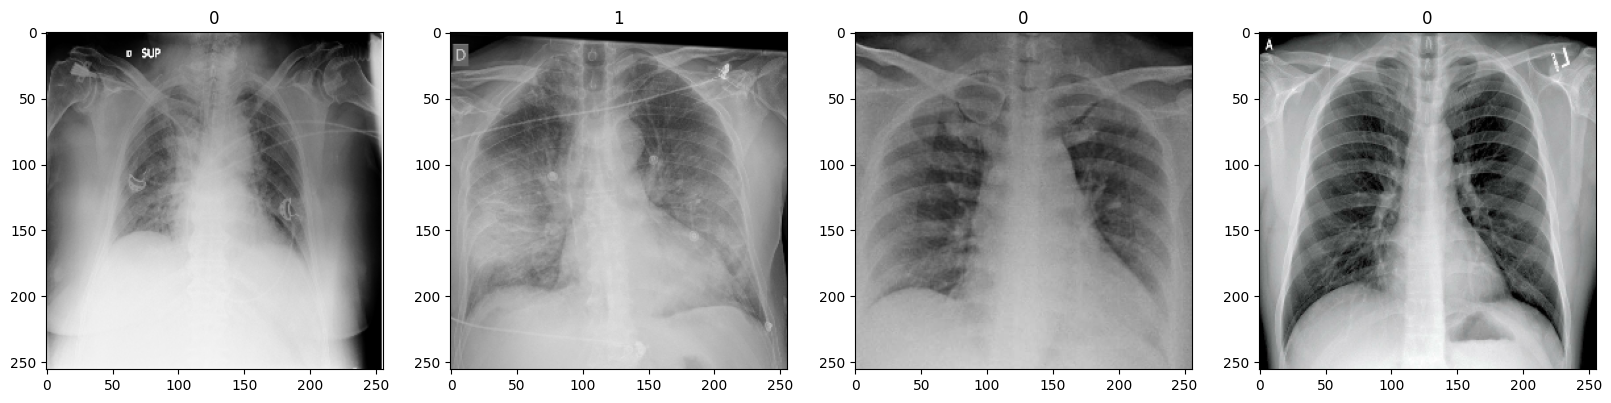

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    
# 1 is positive, 0 is negative

In [82]:
len(dt)

5

In [83]:
train_size = int(len(dt)*.7)
validate_size = int(len(dt)*.2)
test_size = int(len(dt)*.1)+1

In [84]:
print(train_size, validate_size, test_size)

3 1 1


In [86]:
train = dt.take(train_size)
validate = dt.skip(train_size).take(validate_size)
test = dt.skip(train_size+validate_size).take(test_size)

### Build Convolutional Neural Network Classifier

In [87]:
classifier = Sequential()

# 16 filters of size 3x3 and stride 1
classifier.add(Conv2D(16, (3, 3), 1,
                      input_shape = (256, 256, 3),
                      activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32 , (3, 3), 1,
                      input_shape = (256, 256, 3),
                      activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(16, (3, 3), 1,
                      input_shape = (256, 256, 3),
                      activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

# 256 neurons
classifier.add(Dense(units=256, activation="relu"))

# Sigmoid for output 1 or 0
classifier.add(Dense(units=1, activation="sigmoid"))

classifier.compile(optimizer="adam",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

In [88]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [89]:
logdir = "logs"

In [90]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [91]:
hist = classifier.fit(train, epochs = 60 , validation_data = validate, callbacks=[tensorboard_callback])

Epoch 1/60
3/3 [==============================] - 9s 2s/step - loss: 1.3237 - accuracy: 0.6458 - val_loss: 1.1227 - val_accuracy: 0.3438
Epoch 2/60
3/3 [==============================] - 8s 2s/step - loss: 0.9403 - accuracy: 0.3333 - val_loss: 0.6843 - val_accuracy: 0.5312
Epoch 3/60
3/3 [==============================] - 7s 2s/step - loss: 0.6289 - accuracy: 0.6979 - val_loss: 0.7470 - val_accuracy: 0.5938
Epoch 4/60
3/3 [==============================] - 7s 2s/step - loss: 0.7214 - accuracy: 0.6146 - val_loss: 0.6394 - val_accuracy: 0.6562
Epoch 5/60
3/3 [==============================] - 7s 2s/step - loss: 0.7217 - accuracy: 0.4375 - val_loss: 0.7051 - val_accuracy: 0.3125
Epoch 6/60
3/3 [==============================] - 7s 2s/step - loss: 0.6763 - accuracy: 0.6250 - val_loss: 0.6700 - val_accuracy: 0.5938
Epoch 7/60
3/3 [==============================] - 7s 2s/step - loss: 0.6487 - accuracy: 0.6354 - val_loss: 0.6884 - val_accuracy: 0.5625
Epoch 8/60
3/3 [=========================

3/3 [==============================] - 7s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.6918e-04 - val_accuracy: 1.0000


In [92]:
hist.history

{'loss': [1.3236509561538696,
  0.940284252166748,
  0.628865659236908,
  0.7213535904884338,
  0.7217156887054443,
  0.6762526631355286,
  0.648724377155304,
  0.6288185715675354,
  0.6249374747276306,
  0.6117032766342163,
  0.5877051949501038,
  0.5556077361106873,
  0.5833759903907776,
  0.5293849110603333,
  0.49747541546821594,
  0.44675469398498535,
  0.3962843716144562,
  0.3437786400318146,
  0.2634311020374298,
  0.3315340578556061,
  0.2918204367160797,
  0.23482322692871094,
  0.22765642404556274,
  0.28239962458610535,
  0.1993231177330017,
  0.14857298135757446,
  0.1347789615392685,
  0.12505175173282623,
  0.13872230052947998,
  0.11211039870977402,
  0.08080778270959854,
  0.07696636766195297,
  0.0764232873916626,
  0.047286197543144226,
  0.0656801238656044,
  0.07736176997423172,
  0.05983937159180641,
  0.06011979654431343,
  0.059937942773103714,
  0.06102031096816063,
  0.02014434151351452,
  0.031597524881362915,
  0.03372080996632576,
  0.041971296072006226,
  

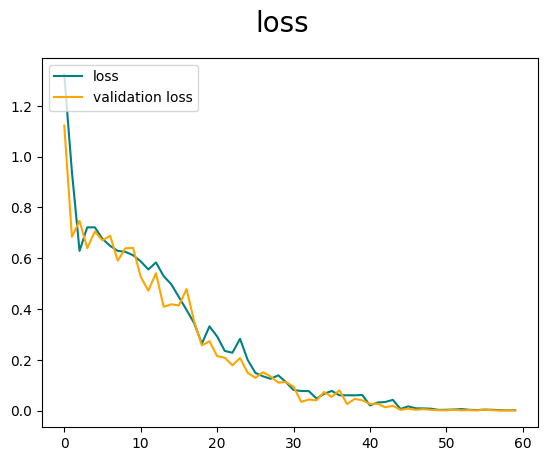

In [93]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="validation loss")

fig.suptitle("loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

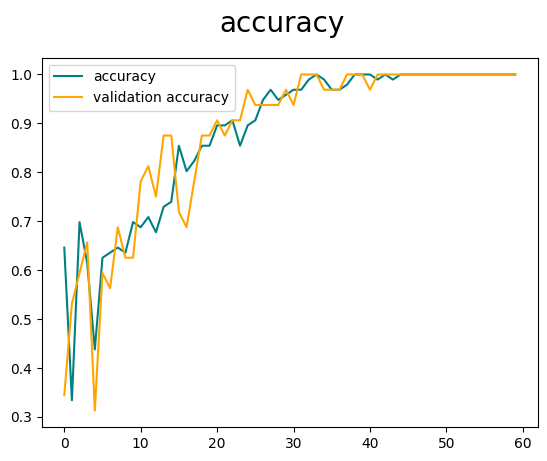

In [94]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="validation accuracy")

fig.suptitle("accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Performance Evaluation

In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [96]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [97]:
len(test)

1

In [98]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = classifier.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 348ms/step


In [99]:
print("Precision: ", precision.result().numpy(), ",",
     "Recall: ", recall.result().numpy(), ",",
     "Accuracy: ", accuracy.result().numpy())

Precision:  1.0 , Recall:  1.0 , Accuracy:  1.0


### Import Classifier and Test

In [100]:
from tensorflow.keras.models import load_model

In [101]:
classifier.save(os.path.join("classifier", "covidClassifier.h5"))

In [102]:
os.path.join("classifier", "covidClassifier.h5")

'classifier/covidClassifier.h5'

In [103]:
# Using sample image from the internet, supposedly it outputs "Not Covid"

sample_img = cv2.imread("/Users/katarinajoanne/University/UGM/2 - Second Year/Fourth Semester/Computer Vision and Image Analysis/Assignment-2/neg_sample.png")

In [104]:
new_classifier = load_model(os.path.join("classifier", "covidClassifier.h5"))

In [105]:
resize = tf.image.resize(sample_img, (256, 256))

In [106]:
yhatnew = new_classifier.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 109ms/step


In [107]:
if yhatnew > 0.5:
    print("Covid")
else:
    print("Not Covid")

Not Covid
